# Salary Prediction Of Newly Hired Employees

## Data Preprocessing

### The main aim is to find salary of newly hired employees.

## Import Libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Datasets

In [8]:
df = pd.read_csv(r'https://drive.google.com/uc?export=download&id=1gzxhVobrV6j4IhqPpbNl1dqC9A-mrtGG')
college_df = pd.read_csv(r'https://drive.google.com/uc?export=download&id=1AGybDQrVY5f5HO4bPA8zA5it95IwWxeT')
city_df = pd.read_csv(r'https://drive.google.com/uc?export=download&id=1fSqMMXvkkWJ7rGkgNV4XES3E2hLPoUh4')
df.shape

(1589, 8)

In [9]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


## Exploring Data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


In [11]:
#There are no null values present in data
df.isnull().sum()

College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
dtype: int64

## Converting Categorical values to Numerical Values

### Converting College Categorical Values to Number

In [12]:
Tier1 = college_df['Tier 1'].tolist()
Tier2 = college_df['Tier 2'].tolist()
Tier3 = college_df['Tier 3'].tolist()

In [13]:
for item in df.College:
    if item in Tier1:
        df['College'].replace(item, 1, inplace = True)
    elif item in Tier2:
        df['College'].replace(item, 2, inplace = True)
    elif item in Tier3:
        df['College'].replace(item, 3, inplace = True)

### Convering City Categorical Values to Number

In [14]:
metro_cities = city_df['Metrio City'].tolist()
non_metro_cities = city_df['non-metro cities'].tolist()

In [15]:
for item in df.City:
    if item in metro_cities:
        df['City'].replace(item, 1, inplace = True)
    elif item in non_metro_cities:
        df['City'].replace(item, 0, inplace = True)

### Converting Role Categorical Values to Number

In [16]:
df['Role'].value_counts()

Executive    1261
Manager       328
Name: Role, dtype: int64

In [17]:
#from above we came to know that there are only 2 fields in role columns
#we need to create n-1 or 1 dummy variable to convert this into numerical format

In [18]:
#creating a new dataframe df2 that contains all values in numerical format
df2 = pd.get_dummies(df,drop_first=True)

In [19]:
#checking if all values are in numerical format
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Manager         1589 non-null   uint8  
dtypes: float64(2), int64(5), uint8(1)
memory usage: 88.6 KB


In [20]:
#checking for duplicate values
df2.duplicated().sum()

46

In [21]:
#Removing duplicates from dataframe
df2.drop_duplicates(inplace=True)

In [22]:
df2.shape

(1543, 8)

In [23]:
#df2 is ready

## Data Visualization

### HeatMap

Below we can see the variety of different features value. The value of feature 'Previous CTC' AND 'CTC' are greater then other

<AxesSubplot:>

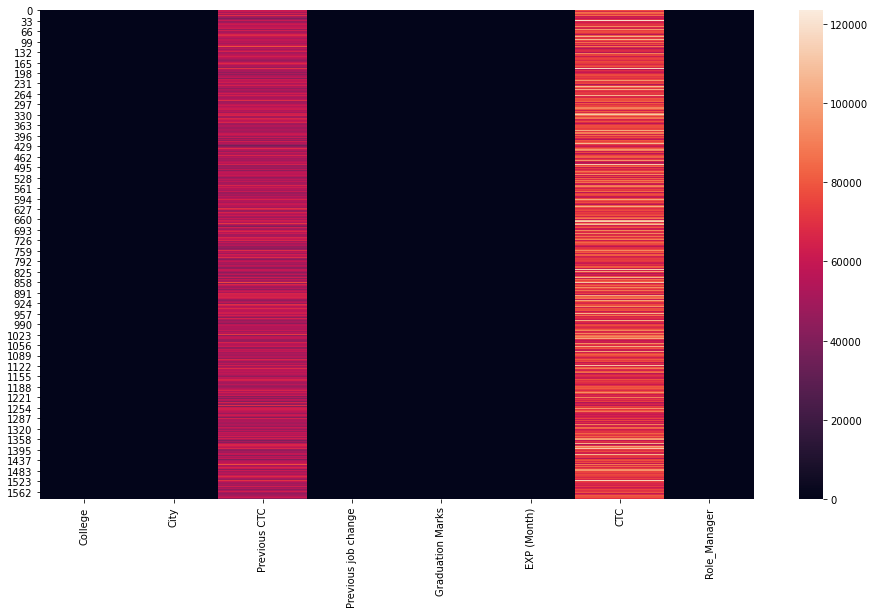

In [53]:
plt.figure(figsize = (16, 9))
sns.heatmap(df2)

## Heatmap of a Correlation Matrix

To find a correlation between each feature and CTC we visualize heatmap using the correlation matrix

<AxesSubplot:>

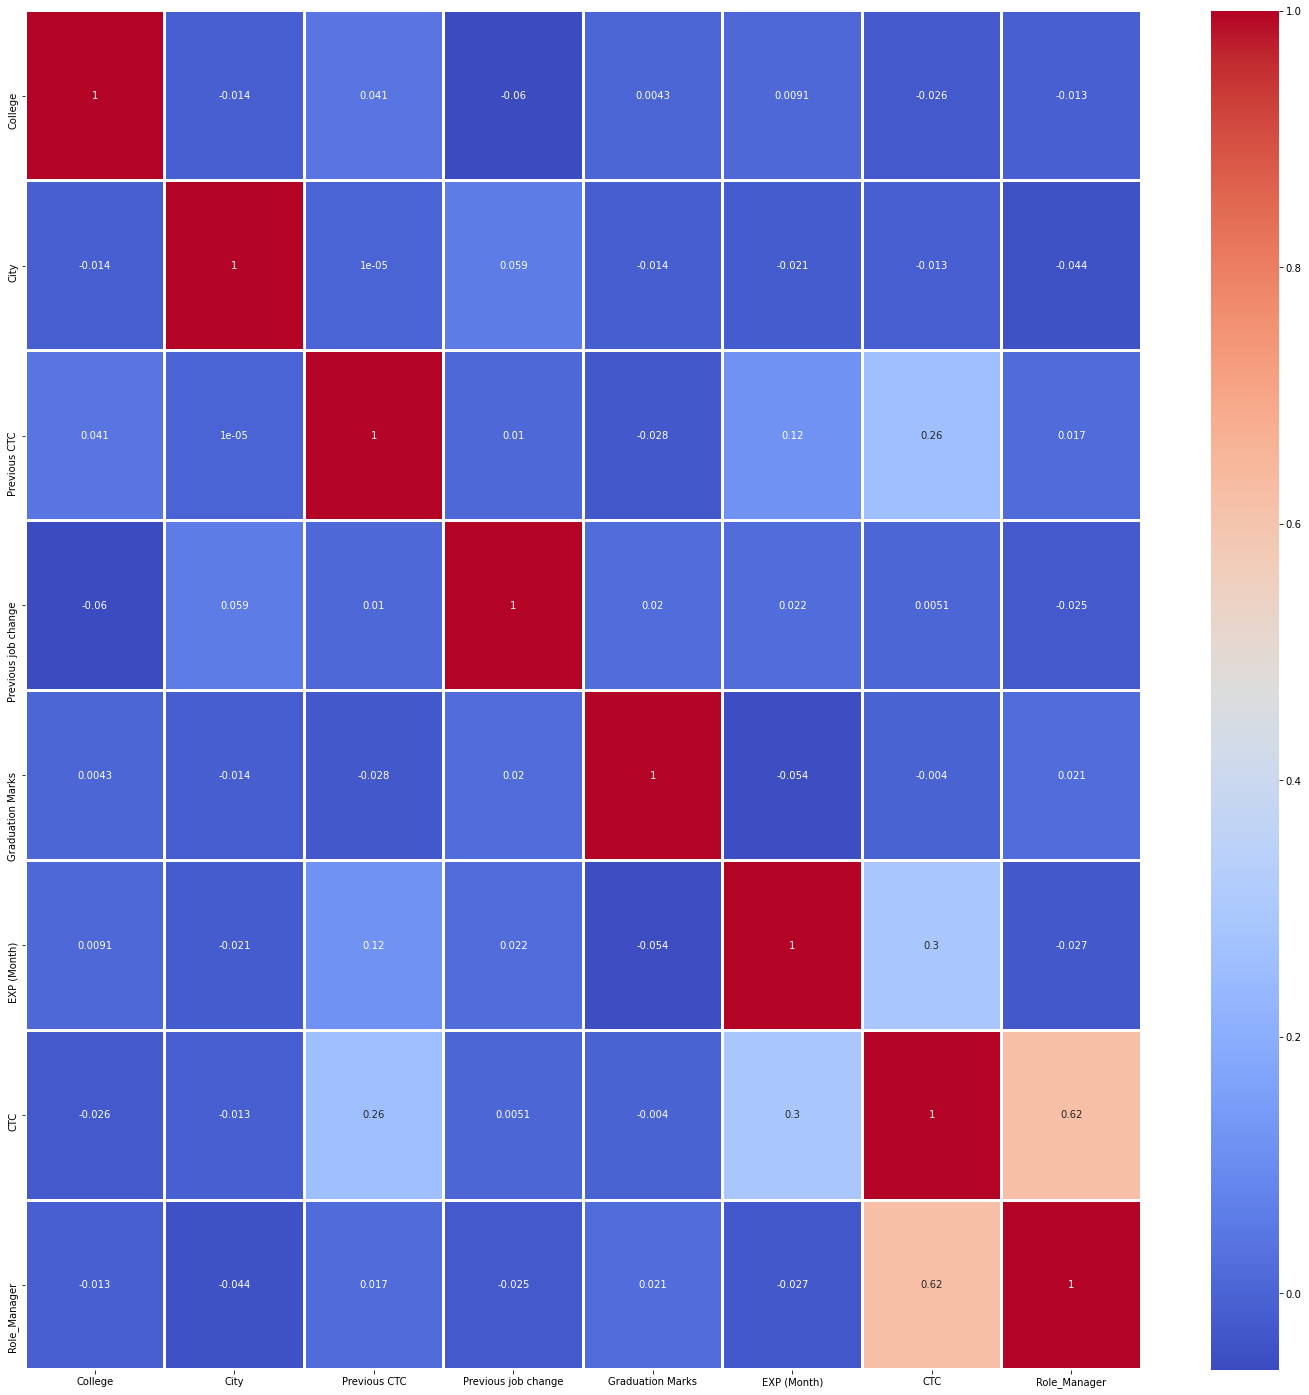

In [57]:
plt.figure(figsize = (25,25))
sns.heatmap(df2.corr(), annot = True, cmap='coolwarm', linewidths = 2)

## Correlation Barplot

Taking the correlation of each feature eith the CTC and the visualize barplot

In [59]:
#create another Dataframe by droping CTC 
df3 = df2.drop(['CTC'], axis = 1)
print("The shape of 'df3' is : ", df3.shape)

The shape of 'df3' is :  (1543, 7)


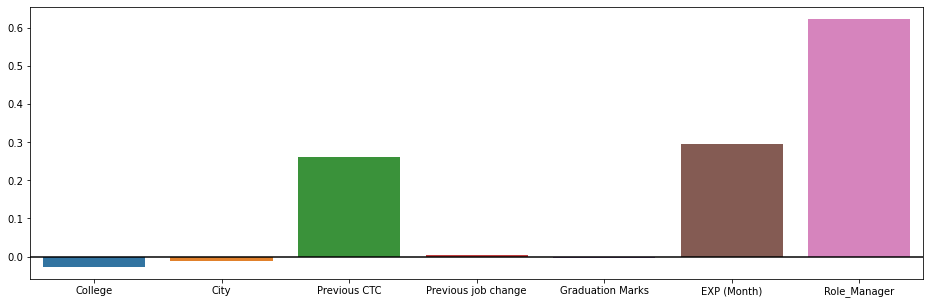

In [61]:
# visualize correlation barplot
plt.figure(figsize = (16,5))
ax = sns.barplot(x=df3.corrwith(df2.CTC).index, y=df3.corrwith(df2.CTC))
ax.axhline(0, color = 'black')

From the above correlation barplot we can say that 'Role_Manager' feature is strongly positively correlated with the CTC than others. 'College','City','Graduation Marks' are negetively correlated.

## Finding Outliers and Removal

In [24]:
df2.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
count,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000
mean,1.977317,0.511342,55545.792612,2.530136,59.900843,39.174984,75393.887628,0.207388
std,0.835421,0.500033,6677.101810,1.123487,14.926535,14.056555,12585.690921,0.405567
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000
25%,1.000000,0.000000,50537.000000,2.000000,47.000000,27.000000,66939.040000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,0.000000
75%,3.000000,1.000000,60124.500000,4.000000,73.000000,51.000000,80601.825000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000


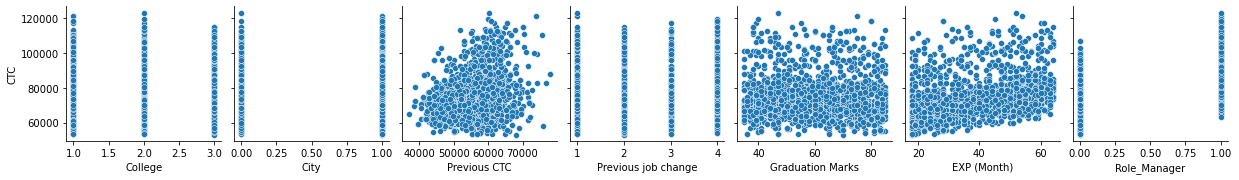

In [25]:
# Creating scatterplot of all features with CTC
X_vars = ['College', 'City', 'Previous CTC', 'Previous job change' , 'Graduation Marks', 'EXP (Month)', 'Role_Manager']
y_vars = ['CTC']
sns.pairplot(x_vars = X_vars, y_vars = y_vars, data =df2)

In [26]:
#funcion to create histogram, and boxplot

def diagnostic_plots(df, variable):
    #function takes a dataframe (df) 
    #the variable of interest as arguments
    
    #define figure size
    plt.figure(figsize = (16,4))
    
    #histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')
    
    #boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()
    

**** College ****


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


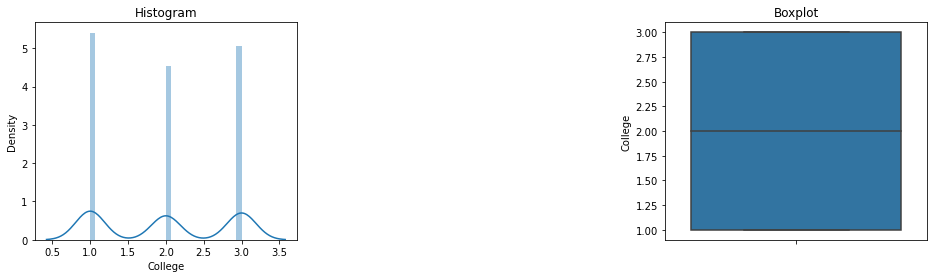

**** City ****


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


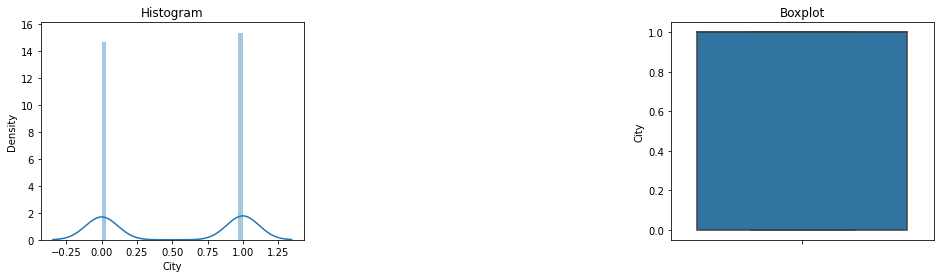

**** Previous CTC ****


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


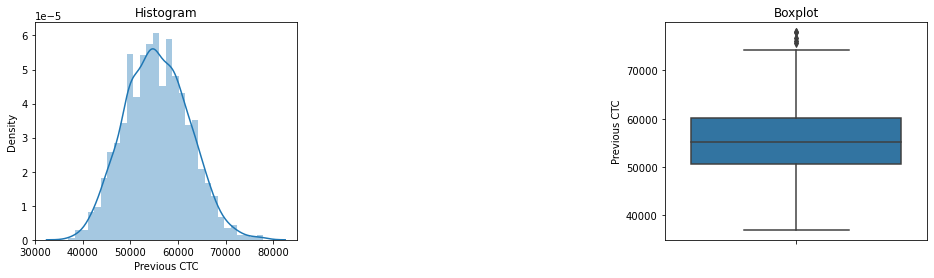

**** Previous job change ****


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


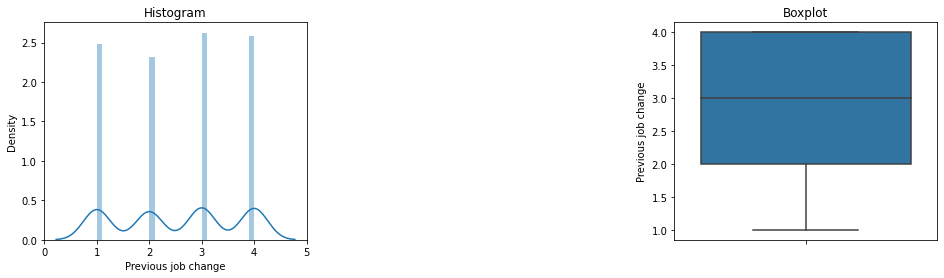

**** Graduation Marks ****


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


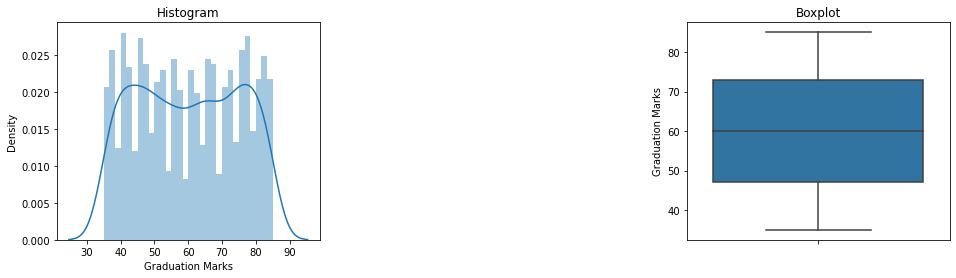

**** EXP (Month) ****


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


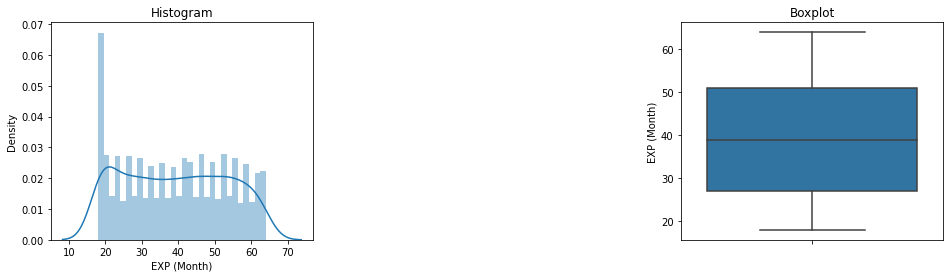

**** CTC ****


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


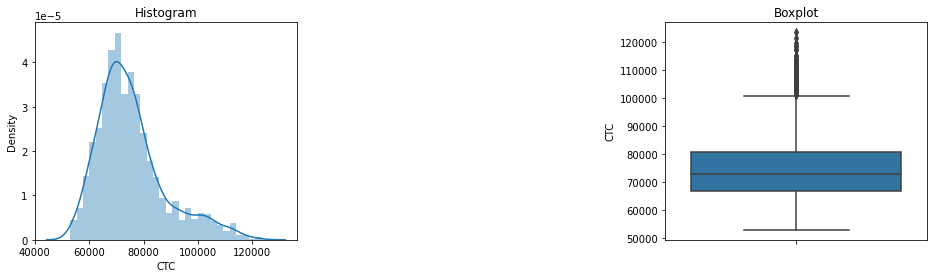

**** Role_Manager ****


F:\ANACONDA\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


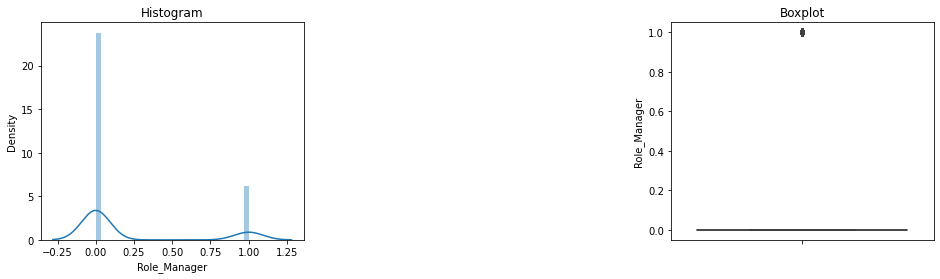

In [27]:
for item in df2.columns:
    print('**** {} ****'.format(item))
    diagnostic_plots(df2, item)
    
#Here We observe outlier using histogram and boxplot

From above boxplot we can say that there are some outliers seen in CTC and Previous CTC but after visualizing histogram, pairplot and other factors we can say that they are valid data values

In [28]:
#Now final dataframe df2 is ready to solve problem further
df2.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,1
1,2,0,57081.0,1,84,18,68005.87,0
2,3,0,60347.0,2,52,28,76764.02,0
3,3,0,49010.0,2,81,33,82092.39,0
4,1,0,57879.0,4,74,32,73878.10,0


## Split Dataframe in Train and Test

In [29]:
#input vaiable
X = df2.drop(['CTC'], axis = 1)
X.head(7)

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
0,2,0,55523.0,3,66,19,1
1,2,0,57081.0,1,84,18,0
2,3,0,60347.0,2,52,28,0
3,3,0,49010.0,2,81,33,0
4,1,0,57879.0,4,74,32,0
5,2,0,54340.0,4,73,31,0
6,3,1,60298.0,1,42,46,0


In [30]:
#output variable
y = df2['CTC']
y.head(7)

0    71406.58
1    68005.87
2    76764.02
3    82092.39
4    73878.10
5    59950.89
6    66602.34
Name: CTC, dtype: float64

In [31]:
#split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 51)

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (1234, 7)
Shape of y_train =  (1234,)
Shape of X_test =  (309, 7)
Shape of y_test =  (309,)


## Feature Scaling

### Converting different units and magnitude data in one unit

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##  Salary Prediction Machine Learning Model Building

As of now, We have clean data to build the MI model. Now we have to find wheich Machine Learning Algorithm is best for the data. The output is Regression format so we will use Supervised regresssion machine learning Algorithms.

To build the best model, we have to train and test the dataset with multiple machine learning algorithms then we can find the best regression ML model.

In [33]:
# Importing libraries for checking r2_Score and mean squared error
from sklearn.metrics import mean_squared_error , r2_score

## Linear Regression

In [34]:
from sklearn.linear_model import LinearRegression

#create a Linear Regression Model
lr = LinearRegression()

#Fit the model to the training data
lr.fit(X_train, y_train)

#make predections on the test data
lr_pred = lr.predict(X_test)

#Calculate R2 score
lr_r2 = r2_score(y_test, lr_pred)

#calculate mean squared error
lr_mse = mean_squared_error(y_test, lr_pred)

#print hte R2 score and Mean Squared Error
print("R2 Score:" , lr_r2)
print("Mean Squared Error:", lr_mse)

R2 Score: 0.5689124207334237
Mean Squared Error: 74796095.77958494


## Lasso

In [35]:
from sklearn.linear_model import Lasso

#Create a Lasso regression model
lr_lasso = Lasso()

#Fit the model to the training data
lr_lasso.fit(X_train, y_train)

#Make predictions on the test data
lasso_pred = lr_lasso.predict(X_test)

#Calculate R2 Score
lasso_r2 = r2_score(y_test, lasso_pred)

#calculate mean squared error
lasso_mse = mean_squared_error(y_test, lasso_pred)

#print the r2 score and mean squared error
print("R2 Score : ", lasso_r2)
print("Mean Squared Error : ", lasso_mse)

R2 Score :  0.5688944754078107
Mean Squared Error :  74799209.39351842


## Ridge

In [36]:
from sklearn.linear_model import Ridge

#Create a Ridge regression model
lr_ridge = Ridge()

#Fit the model to the training data
lr_ridge.fit(X_train, y_train)

#Make predictions on the test data
ridge_pred = lr_ridge.predict(X_test)

#Calculate R2 score
ridge_r2 = r2_score(y_test, ridge_pred)

#Calculate mean squared error
ridge_mse = mean_squared_error(y_test, ridge_pred)

#Print the R2 score and mean squared error
print("R2 Score : ", ridge_r2)
print("Mean Squared Error : ", ridge_mse)

R2 Score :  0.5688212445451577
Mean Squared Error :  74811915.3560199


## Polynomial Regression 

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Create polynomial features
poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#Create a Linear Regression model
lr_poly = LinearRegression()

#Fit the model to the polynomial training data
lr_poly.fit(X_train_poly, y_train)

#Make predicions on the polynomial training test data
poly_pred = lr_poly.predict(X_test_poly)

#Calculate R2 score
poly_r2 = r2_score(y_test, poly_pred)

#calculte mean squared error
poly_mse = mean_squared_error(y_test, poly_pred)

#Print the R2 score and MSE
print("R2 Score : ", poly_r2)
print("Mean Squared Error  : ", poly_mse)


R2 Score :  0.6219353473292805
Mean Squared Error  :  65596322.724362776


## Support Vector Regression

Here changing the kernal parameter to rbf, poly, linear giving wrost score

In [38]:
from sklearn.svm import SVR

#create an SVR model with RBF kernal
svr = SVR(kernel = 'rbf')

#Fit the model to the training data
svr.fit(X_train, y_train)

#Make predictions on the test data
svr_pred = svr.predict(X_test)

#Calculate R2 score
svr_r2 = r2_score(y_test, svr_pred)

#Calculate mean squared error
svr_mse = mean_squared_error(y_test, svr_pred)

#Print the R2 score and MSE 
print("R2 Score:", svr_r2)
print("Mean Squared Error : ", svr_mse)

R2 Score: -0.012023213746057193
Mean Squared Error :  175591663.6598451


## Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

#Create a Random Forest Regressor model
rfr = RandomForestRegressor()

#Fit the model to the training data
rfr.fit(X_train, y_train)

#Make predictions on the test data
rfr_pred = rfr.predict(X_test)

#Calculate R2 score
rfr_r2 = r2_score(y_test, rfr_pred)

#Calculate mean squared error
rfr_mse = mean_squared_error(y_test, rfr_pred)

#Print the R2 score and MSE
print("R2 Score : ", rfr_r2)
print("Mean Squared Error : ", rfr_mse)

R2 Score :  0.6878571734916327
Mean Squared Error :  54158518.758882724


## K Nearest Neighbour

In [40]:
from sklearn.neighbors import KNeighborsRegressor

#Create a KNN Regressor model
knn_reg = KNeighborsRegressor(n_neighbors = 20)

#Fit the model to the test data
knn_reg.fit(X_train, y_train)

#Make predictions on the test data
knn_pred = knn_reg.predict(X_test)

#Calculate R2 score
knn_r2 = r2_score(y_test, knn_pred)

#Calculate mean squared error
knn_mse = mean_squared_error(y_test, knn_pred)

#print the R2 score and MSE
print("R2 Score : ", knn_r2)
print("Mean Squared Error : ", knn_mse)

R2 Score :  0.5614305977074089
Mean Squared Error :  76094233.74174057


## Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor

#Create a Decision Tree Regressor model
dt_reg = DecisionTreeRegressor()

#Fit the model to the training data
dt_reg.fit(X_train, y_train)

#Make predictions on the test data
dt_pred = dt_reg.predict(X_test)

#Calculate R2 score
dt_r2 = r2_score(y_test, dt_pred)

#Calculate mean squared error
dt_mse = mean_squared_error(y_test, dt_pred)

#Print the R2 score and MSE
print("R2 Score : ", dt_r2)
print("Mean Squared Error : ", dt_mse)

R2 Score :  0.360335034360451
Mean Squared Error :  110985433.90700325


## Gradient Boost Regression

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

#Create a Gradient Boosting Regressor model
gb_reg = GradientBoostingRegressor()

#Fit the model to the training data
gb_reg.fit(X_train, y_train)

#Make predictions on the test data
gb_pred = gb_reg.predict(X_test)

#Calculate R2 score
gb_r2 = r2_score(y_test, gb_pred)

#Calculate mean squared error
gb_mse = mean_squared_error(y_test, gb_pred)

#print the R2 score and MSE
print("R2 Score : ", gb_r2)
print("Mean Squared Error : ", gb_mse)

R2 Score :  0.6446805523607648
Mean Squared Error :  61649902.98070977


### Final Score Summary

In [43]:
print(pd.DataFrame([{'Model' : 'Linear Regression','r2_score': lr_r2, 'MSE' : lr_mse},
                    {'Model' : 'Lasso' , 'r2_score' : lasso_r2 , 'MSE' : lasso_mse},
                    {'Model' : 'Ridge' , 'r2_score' : ridge_r2, 'MSE' : ridge_mse},
                    {'Model' : 'Polynomial Regression', 'r2_score' : poly_r2, 'MSE' : poly_mse},
                    {'Model' : 'Support Vector Machine', 'r2_score' : svr_r2, 'MSE' : svr_mse},
                    {'Model' : 'Random Forest' , 'r2_score' : rfr_r2 , 'MSE' : rfr_mse},
                    {'Model' : 'K Nearest Neighbour' , 'r2_score' : knn_r2 , 'MSE' : knn_mse},
                    {'Model' : 'Decision Tree' , 'r2_score' : dt_r2 , 'MSE' : dt_mse},
                    {'Model' : 'Gradient Boosting ' , 'r2_score' : gb_r2, 'MSE' : gb_mse}],
                     columns = ['Model' , 'r2_score' , 'MSE']))

                    Model  r2_score           MSE
0       Linear Regression  0.568912  7.479610e+07
1                   Lasso  0.568894  7.479921e+07
2                   Ridge  0.568821  7.481192e+07
3   Polynomial Regression  0.621935  6.559632e+07
4  Support Vector Machine -0.012023  1.755917e+08
5           Random Forest  0.687857  5.415852e+07
6     K Nearest Neighbour  0.561431  7.609423e+07
7           Decision Tree  0.360335  1.109854e+08
8      Gradient Boosting   0.644681  6.164990e+07


### From the above summary it is clear that the best model for this project problem is Random Forest Regression model with highest r2_score and lowest mean square error

## Cross Validation Score for Random Forest Regression

In [44]:
from sklearn.model_selection import KFold,cross_val_score
cvs_rfr = cross_val_score(rfr, X_train,y_train, cv = 5)
cvs_rfr, cvs_rfr.mean()

(array([0.59046365, 0.57267907, 0.62399954, 0.6310441 , 0.5202006 ]),
 0.5876773930406584)

In [45]:
#Here there is differnce of 10% which is common when doing cross validation and compare with r2 score as the data is small so this can happen

## Question - Answers

### 1. Your views about the problem statement?

 This problem involves predicting the salary of newly hired employees based on various given features.
    Given features include : 
    
        1] Previous Salary 
        2]College tiers (tier1, tier2, tier3)
        3] Graduation Marks 
        4]Roles of an Emoplyee (Executive and Manager)
        5]City(Metro and Non-Metro) 
        6]Number of job changes 
        7]Experience in months/years.
        
  Here the goal is to utilize this features and build a machine learning model to predict the best possible salary for each 
  newly hired employee.
    
  Among the above mentioned features Employee Role , Experiencem and previoues CTC have the most significant impact on current
  CTC. The remaining have low impact.
    
  During solving this problem to predict the salary of newly hired employee we have used various machnine learning models 
  suitable for solving regression problems to find teh best possible model for this problem.
    
  Since both the input data(employee features) and the corresponding output(Salary) are provided, this problem falls under the 
  category of supervised reression.
    
   So, By applying diffrernt regression models and evaluating their performance , we can identify the most suitable and 
  effective machine learning model for predicting salary of newly hired employees. 
        

### 2. What will be your approach to solving this task?

The main goal of this project is to build a machine learning model which predicts
the salary of newly hired employees

To accomplish this I have followed following steps:

 1] Firstly, import the necessary libraries: numpy, pandas, seaborn
 
 2] Load the datasets using pandas
 
 3] Check for any null values in the dataset(Here there are no null values)
 
 4] Obtain information about the dataset, including number of categorical and numerical features
 
 5] Convert categorical values to numerical format
 
 6] Check for duplicates in dataset(Here 46 duplicate rows found). Remove those duplicate rows.
 
 7] Look for outliers by creating scatter plots, distribution plots, box plots and heatmaps(No outliers were found)
 
 8] Analyze the correlation matrix by plotting a correlation heatmap and explore the relationship between different features and     CTC
 
 9] Split the data into train and test sets using 80:20 ratio
 
 10] Perform feature scaling
 
 11] Check for different librarires, fitting them and evaluating their R2 score and MSE
 
 12] After building all models, Random Forest REression model has highest R2 score and lowest MSE
 
 By following this approach, the Random Forest Model can be considered as best possible model for this problem.

### 3. What were the available ML model options you had to perform this task?


To solve the supervised regression model problem , the following models can be used:
    
    1. Linear Regression
    2. Lasso Regression
    3. Ridge Regression
    4. Random Forest Regression
    5. Polynomial Regression
    6. Gradient Boosting Regression
    7. Decision Tree Regressor
    8. K neihbors Regression
    
    These model are suitable for regression tasks and can be applied to predict salary based on given features.

### 4 Which model’s performance is best and what could be the possible reason for that?

The Random Forest Regression model was found to be the best for predicting employee salary.
Because after building model and calculating their respective R2 score and mean sqaured error its clear that Random Forest Regression models performance is the best.
Compared to other models, Random Forest Regression has highest R2 score of 0.687857 and low mean squared error as 5.415852e+07 Hence Random Forest Regression is most suitable model for our problem.
Here are some possible reasons for its superior performance:
    
    1. Random Forest Regression can capture complex non-linear relaionships between features and CTC,
       allowing for better predictions compared to linear models.
    2. The model combines multiple decision trees to make predictions, This ensemble approach help reduce
       overfitting and improves generalization by averaging the predictions from decision trees.
    3. Random Forest Regression is less sensitive to outliers, thanks to its averaging effect.
       Outliers have less impact on the overall predictions, resulting in more stable and accurate results.
    4. The model provides information on the importance of features in predicting salary. This helps
       identify the most influentisl factors and focus on the most relevant features.
    5. Random Forest Regression can handle datasets with a large number of features effectively,
       without requiring extensive preprocessing or feature engineering.
        
    Model performance can vary depending on the dataset and problem. These reasons provides an understanding
    of why Random Forest Regression performed well in this case.

### 5. What steps can you take to improve this selected model’s performance even further?

To further improve the performance of the selected Random Forest Regreesion model, 
we can consider following steps:
    
    1] Hyperparameter Tuning: Optimize the hyperparameters of the Random Forest model.This involves adjusting parameters
       like the number of trees, maximum depth of trees, minimum samples required to split a node, and others. Use 
       techniques like grid search or randomized search to find the best combination of hyperparameters that yields optimal              performance.
        
    2] Feature Engineering : Explore additional feature engineering techniques to enhance the predictive power of the model. 
       This may involve creating new features based on domain knowledge or transforming existing features to better 
       represent relationships with the target variable.
        
    3] Cross-Validation : Implement cross-validation techniques, such as k-fold cross-validation to evaluate the models 
       performance more robustly. This helps assess how well the model generalizes to unseen data and provides a more
       reliable estimation of its performance.
        
    4] Handling Imblanced Data : If the dataset is imbalanced, where one class is signinficantly underrepresnted compared to 
       the other class, consider using techniques such as oversampling, undersampling or data augmentation to balance the 
       dataset. This can help prevent bias towards the majority class and improve model performance.
        
    5] Additional Data : Consider acquiring more data if feasible. increasing the size of the size of the training dataset 
       can help the model learn more representative patterns and improve its predictive performance. 